This note book is setup to makerandom arrays, to be able to test the dask svd_compressed function, e.g how does array sizes/shapes/chunks/optional parameters effect run time.

In [2]:
import dask.array as darr
import time 
import matplotlib.pyplot as plt
from dask.distributed import Client
import numpy as np
from dask import compute

In [3]:
?darr.linalg.svd_compressed

Signature:
darr.linalg.svd_compressed(
    a,
    k,
    iterator='power',
    n_power_iter=0,
    n_oversamples=10,
    seed=None,
    compute=False,
    coerce_signs=True,
)
Docstring:
Randomly compressed rank-k thin Singular Value Decomposition.

This computes the approximate singular value decomposition of a large
array.  This algorithm is generally faster than the normal algorithm
but does not provide exact results.  One can balance between
performance and accuracy with input parameters (see below).

Parameters
----------
a: Array
    Input array
k: int
    Rank of the desired thin SVD decomposition.
iterator: {'power', 'QR'}, default='power'
    Define the technique used for iterations to cope with flat
    singular spectra or when the input matrix is very large.
n_power_iter: int, default=0
    Number of power iterations, useful when the singular values
    decay slowly. Error decreases exponentially as `n_power_iter`
    increases. In practice, set `n_power_iter` <= 4.
n_oversa

In [4]:
x = darr.random.random(size=(t_size,spatial_size), chunks=(t_chunk, spatial_chunk)).astype('float32')

u, s, v = darr.linalg.svd_compressed(x, k=10, compute=True)
u.compute()
s.compute()
v.compute()

array([[ 1.4444496e-03,  1.4129945e-03,  1.4938476e-03, ...,
         1.3984455e-03,  1.4745517e-03,  1.4891295e-03],
       [-4.8450427e-04,  3.2761405e-04,  1.7151469e-05, ...,
         2.4914860e-03, -7.9503481e-04,  9.1206102e-04],
       [ 2.1396501e-03, -3.1570406e-03,  5.1682000e-04, ...,
        -1.0999857e-04, -1.7459019e-03,  1.6007866e-03],
       ...,
       [ 2.0086730e-04,  8.9665729e-04,  3.9431592e-03, ...,
        -1.7658828e-03,  9.4173884e-04,  7.0756377e-04],
       [ 6.3921255e-04, -1.4168161e-03,  1.0226753e-03, ...,
         1.0904031e-03,  2.7608778e-04,  1.0904723e-03],
       [-3.8447473e-04,  3.0799350e-04,  1.5099810e-03, ...,
        -2.1667904e-04,  1.8333268e-03,  1.4847541e-03]], dtype=float32)

0
5
10
15


Text(0, 0.5, 'Time (s)')

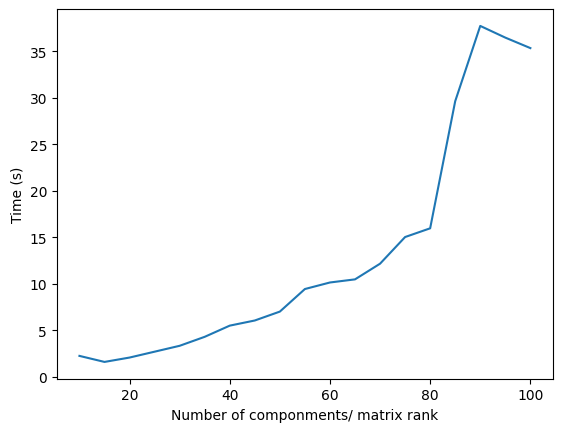

In [21]:
t_size = 100
spatial_size = 500000
t_chunk = 100
spatial_chunk = 50000

n_comp = np.linspace(10,100,19)
times = np.zeros_like(n_comp)

x = darr.random.random(size=(t_size,spatial_size), chunks=(t_chunk, spatial_chunk)).astype('float32')
x.persist()

no_avg = 2
for i in range(len(n_comp)):
    average = 0
    for j in range(no_avg):
        start = time.time()
        u, s, v = darr.linalg.svd_compressed(x, k=n_comp[i])
        u.compute()
        s.compute()
        v.compute()
        final = time.time()
        average += final - start
    average = average/no_avg
    times[i] = average    


plt.plot(n_comp, times)
plt.xlabel('Number of componments/ matrix rank')
plt.ylabel('Time (s)')


0
5


Text(0, 0.5, 'Time (s)')

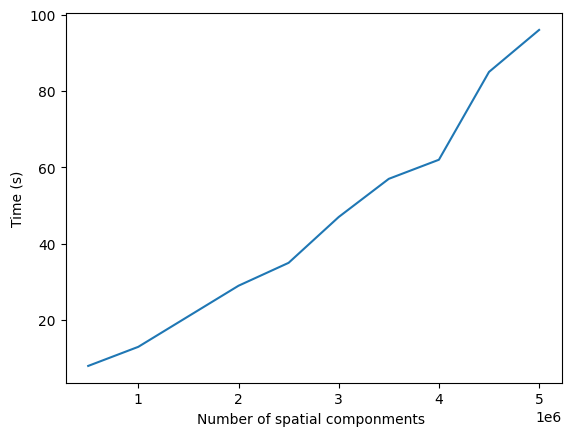

In [5]:
# spatial size .. spatial size is 36,700,320

t_size = 100
#spatial_size = 500000
t_chunk = 100
spatial_chunk = 100000
n_comp = 40

spatial_size = np.arange(500000,5500000,500000)
times = np.zeros_like(spatial_size)


no_avg = 2
for i in range(len(spatial_size)):
    average = 0
    x = darr.random.random(size=(t_size,spatial_size[i]), chunks=(t_chunk, spatial_chunk)).astype('float32')
    x.persist()
    for j in range (no_avg):
        start = time.time()
        u, s, v = darr.linalg.svd_compressed(x, k=n_comp)
        u.compute()
        s.compute()
        v.compute()
        final = time.time()
        average += final - start
    average = average/no_avg
    times[i] = average    


plt.plot(spatial_size, times)
plt.xlabel('Number of spatial componments ')
plt.ylabel('Time (s)')

Text(0, 0.5, 'Time (s)')

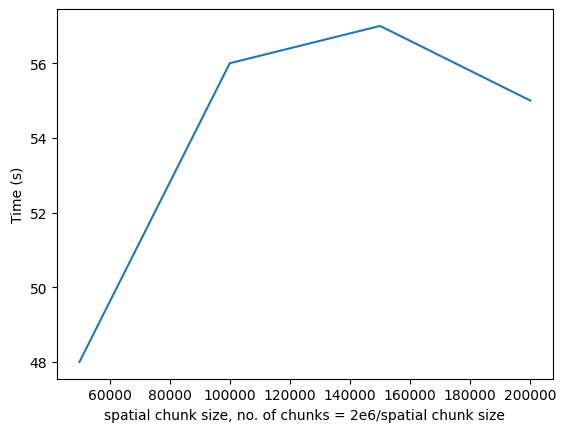

In [8]:
t_size = 100
spatial_size = 2000000
t_chunk = 100
n_comp = 40
#spatial_chunk = 50000


spatial_chunk = spatial_chunk = np.arange(50000,250000, 50000)
times = np.zeros_like(spatial_chunk)




no_avg = 1
for i in range(len(spatial_chunk)):
    average = 0
    x = darr.random.random(size=(t_size,spatial_size), chunks=(t_chunk, spatial_chunk[i])).astype('float32')
    x.persist()
    for j in range(no_avg):
        start = time.time()
        u, s, v = darr.linalg.svd_compressed(x, k=n_comp) 
        u.compute()
        s.compute()
        v.compute()
        final = time.time()
        average += final - start
    average = average/no_avg
    times[i] = average    
    

plt.plot(spatial_chunk, times)
plt.xlabel('spatial chunk size, no. of chunks = 2e6/spatial chunk size')
plt.ylabel('Time (s)')